<a href="https://colab.research.google.com/github/dcugini/ML_course_Pavia_23/blob/main/Schwinger_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCHWINGER MODEL ON THE CHAIN
The Schwinger model is a Quantum Field Theory and represents a Toy Model of the Standard Model.
The study of this Model is of interest in the context of Quantum Siumlations,
since it is 1-dimensional in the space coordinate.
Indeed, after having discretized the space (via the Kougut-Susskind approach) ,we are left with a lattice were each can be eventually occupated by a fermion or an antifermion.
In particular, even sites can be filled by fermions,
odd sites by antifermions.
On the other hand the link between two consecutive sites represents the Electric field between them.
The Electric field variation through a site
is related to the total charge of the particle in that site
through the Gauss law.


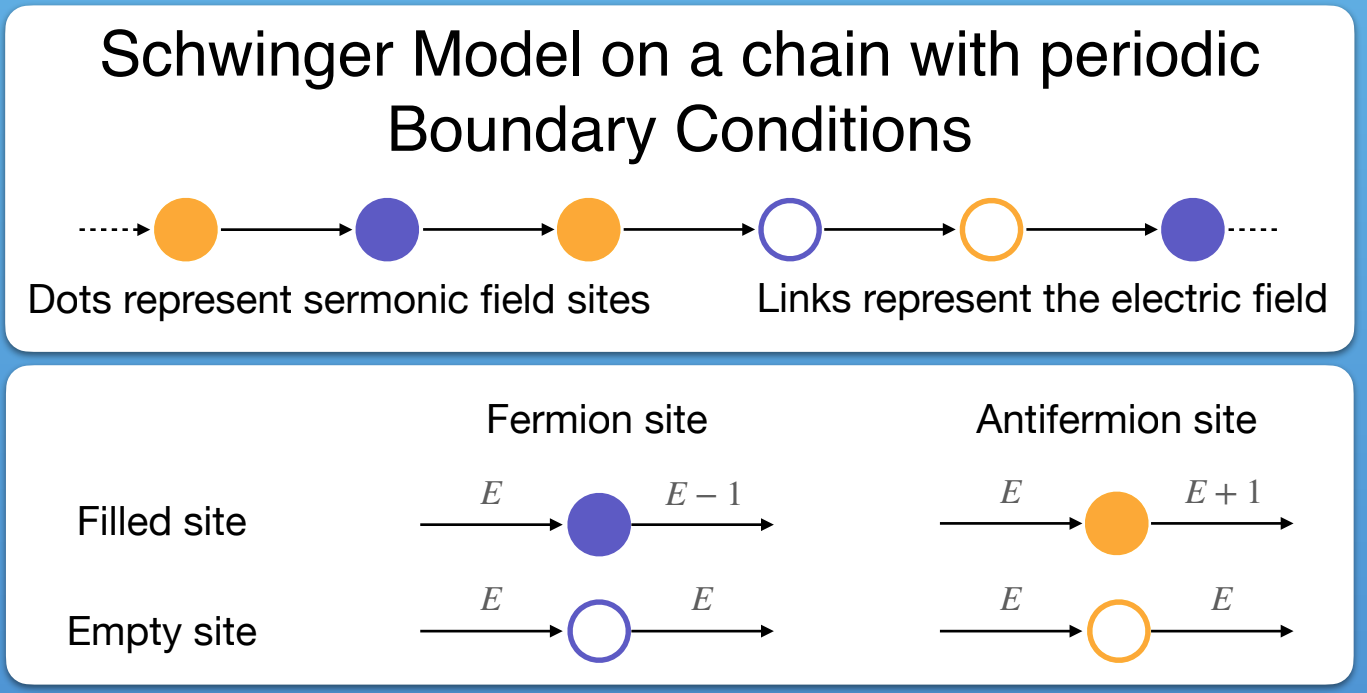

WHAT IS THE PURPOSE?

WHAT IS THE FEATURE? (SITE)

WHAT IS THE DATA? (CHAIN)...

First of all I define the variables that characterise the problem

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# keras imports
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, Dropout, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN


In [ ]:
N = 4       #Number of fermionic - sites
Delta = 1

n_chains_train = int(1e3)
n_chains_val = int(1e3)
n_chains_test = int(1e6)


random.seed(121)


In [ ]:
n_sites = 2*N   #The total number of sites, i.e. fermionic and antifermionic sites


## Data generation

In [ ]:
def rand_chain(fer,antfer):
  rf = random.sample(range(0, N), fer)
  ra = random.sample(range(0, N), antfer)
  r = []
  for i in range(0,N):
    r.append(int(i in rf))
    r.append(int(i in ra))

  return r



In [ ]:
v = []

for i in range(0,n_chains_train ):
  fer = random.randint(0,N)
  antifer = fer
  v.append([rand_chain(fer, antifer),1])

for i in range(0,n_chains_train ):
  fer = random.randint(0,N)
  antifer = random.randint(0,N)
  while fer == antifer:
    antifer = random.randint(0,N)
  v.append([rand_chain(fer, antifer),0])


v = random.sample(v,2*n_chains_train)

x_train = []
y_train = []
for i in range(0,2*n_chains_train ):
  x_train.append(v[i][0])
  y_train.append(v[i][1])



In [ ]:
v = []

for i in range(0,n_chains_val ):
  fer = random.randint(0,N)
  antifer = fer
  v.append([rand_chain(fer, antifer),1])

for i in range(0,n_chains_val ):
  fer = random.randint(0,N)
  antifer = random.randint(0,N)
  while fer == antifer:
    antifer = random.randint(0,N)
  v.append([rand_chain(fer, antifer),0])


v = random.sample(v,2*n_chains_val)

x_val = []
y_val = []
for i in range(0,2*n_chains_val ):
  x_val.append(v[i][0])
  y_val.append(v[i][1])


In [ ]:
def label (c):
  PBC = False
  E = 0
  min = 0
  max = 0
  for i in range(0, n_sites):
    E += ((-1)**i)*(c[i])/(2**i)

  if E == 0:
    PBC = True
  return PBC



In [ ]:
v = []

for i in range(0,n_chains_test ):
  fer = random.randint(0,N)
  antifer = random.randint(0,N)
  c = rand_chain(fer, antifer)
  v.append([c,int(label(c))])


v = random.sample(v,n_chains_test)

x_test = []
y_test = []
for i in range(0,n_chains_test ):
  x_val.append(v[i][0])
  y_val.append(v[i][1])


#CDN 1D

In [ ]:
featureArrayLength = (n_sites,1)
dropoutRate = 0.2

In [ ]:
####
inputList = Input(shape=(featureArrayLength))
x = Conv1D(10, kernel_size=3, data_format="channels_last", strides=1, padding="same", activation='relu')(inputList)
x = AveragePooling1D(pool_size=2)(x)
#
x = Conv1D(20, kernel_size=3, data_format="channels_last", strides=1, padding="same", activation='relu')(x)
x = AveragePooling1D(pool_size=2)(x)
#
#x = Conv1D(60, kernel_size=3, data_format="channels_last", strides=1, padding="same", activation='relu')(x)
#x = AveragePooling1D(pool_size=2)(x)
#
x = Flatten()(x)
x = Dense(5, activation='relu')(x)
x = Dropout(dropoutRate)(x)
x = Dense(2, activation='relu')(x)
x = Dropout(dropoutRate)(x)
output = Dense(1, activation='sigmoid')(x)
####
model = Model(inputs=inputList, outputs=output)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 8, 10)             40        
                                                                 
 average_pooling1d (AverageP  (None, 4, 10)            0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 20)             620       
                                                                 
 average_pooling1d_1 (Averag  (None, 2, 20)            0         
 ePooling1D)                                                     
                                                                 
 flatten (Flatten)           (None, 40)                0     

#TRAINING

In [ ]:
batch_size = 100
n_epochs = 200

In [ ]:
# train
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose = 2,
                validation_data=(x_val, y_val),
                callbacks = [
                EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1),
                TerminateOnNaN()])

Epoch 1/200
20/20 - 68s - loss: 0.6956 - val_loss: 0.6999 - lr: 0.0010 - 68s/epoch - 3s/step
Epoch 2/200
20/20 - 21s - loss: 0.6878 - val_loss: 0.7139 - lr: 0.0010 - 21s/epoch - 1s/step
Epoch 3/200

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
20/20 - 41s - loss: 0.6854 - val_loss: 0.7141 - lr: 0.0010 - 41s/epoch - 2s/step
Epoch 4/200
20/20 - 21s - loss: 0.6828 - val_loss: 0.7145 - lr: 1.0000e-04 - 21s/epoch - 1s/step
Epoch 5/200

Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
20/20 - 18s - loss: 0.6840 - val_loss: 0.7158 - lr: 1.0000e-04 - 18s/epoch - 919ms/step
Epoch 6/200
20/20 - 21s - loss: 0.6827 - val_loss: 0.7158 - lr: 1.0000e-05 - 21s/epoch - 1s/step
Epoch 7/200

Epoch 7: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
20/20 - 19s - loss: 0.6830 - val_loss: 0.7158 - lr: 1.0000e-05 - 19s/epoch - 931ms/step
Epoch 8/200
20/20 - 19s - loss: 0.6828 - val_loss: 0.7158 - lr: 1.0000e-06 - 19s/epoch - 938m

<ipython-input-19-268728ee9474>:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom = 0)


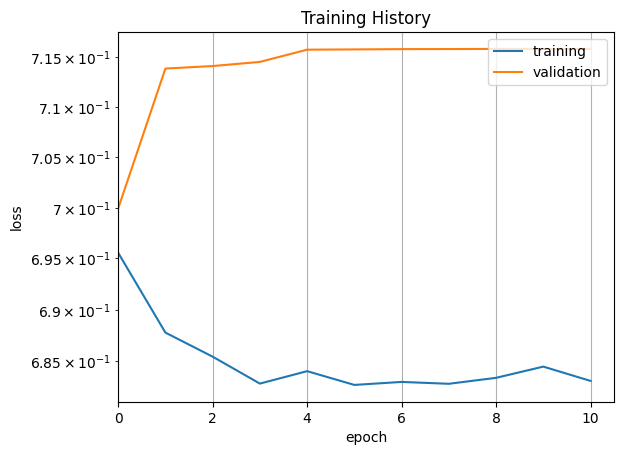

In [ ]:
# plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('Training History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.grid()
plt.ylim(bottom = 0)
plt.xlim(left = 0)
plt.show()

#ROC curves

In [ ]:
labels = ['output']

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
predict_val = model.predict(x_val)

df = pd.DataFrame()
fpr = {}
tpr = {}
auc1 = {}

plt.figure()
for i, label in enumerate(labels):
        df[label] = y_val[:]
        df[label + '_pred'] = predict_val[:]

        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])

        auc1[label] = auc(fpr[label], tpr[label])

        plt.plot(fpr[label],tpr[label],label='%s tagger, auc = %.1f%%'%(label,auc1[label]*100.))
#plt.semilogy()
plt.xlabel("true positive rate")
plt.ylabel("false positive rate")
plt.ylim(0.000001,1)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

31313/31313 [==============================] - 78s 2ms/step
